In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from scipy import stats as st
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
import math as mth
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
from sklearn import metrics 
from plotly import graph_objects as go
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import statsmodels.api as sm

C:\Users\Acer Nitro 5\AppData\Local\Temp\ipykernel_24272\3162936778.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Описание проектаБанк » хочет разобраться, как клиенты пользуются их услугами, а так же составить портрет клиентов, которые склонны уходить из банка.

# Цель исследования
А, из и сегментация клиентов регионального банка по количеству потребляемых прод, а также составление модели вероятности ухода клиентауктов:<br>

проведение исследовательского анализа данных,<br>
сегментация пользователей на основе данных о количестве потребляемых продук
составление модели вероятности ухода из банка,<br>тов,<br>
формулировка и проверка статистических гипотез.<br>
гипотеза различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним;<br>
гипотеза различия заработной платы между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним<br>

По результатам исследования необходимо подготовить:<br>
преработу в wordемых продуктов)<br>

Входные данные<br>
Датасет содержит данные о клиентах банка:<br>

идентификатор пользователя,<br>
баллы кредитного скорномер месяцаа,<br>
город,<br>средняя сумма транзакций объекесть ли комплексный счет (есть страховки, повышенный кэшбек, льготное предложение по кредитным картам и т.д.)ости,<br>
баланс на счёте,<br>
количество продуктов, которыми польвкладbr>
епользовался онлайн или ходил в филиал банкая карта,<br>
активный клиент,<br>
заработная плата клиента,<br>
ушёл или нет.

In [2]:
data = pd.read_table('churn_train.txt')

In [3]:
data

,client_id,month_number,age,lifetime,beh_score,region,channel,avg_transaction_sum,total_products,deposit,is_package,salary_bucket,churn
0,20201,2,38,21,"2,73",Moscow,Online,345,1,1,1,70000.0,0
1,42943,2,30,21,"2,80",Moscow,Branch,269,1,1,1,30000.0,0
2,27570,1,48,13,"2,80",Regions,Online,327,1,1,1,150000.0,1
3,25037,3,40,15,"2,68",Moscow,Online,0,1,1,1,30000.0,0
4,47546,2,20,21,"2,88",Saint-Petersbourgh,Branch,0,1,1,0,190000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8300,41670,2,74,12,"2,81",Moscow,Branch,349,1,1,1,160000.0,0
8301,19167,2,32,13,"2,78",Regions,Branch,344,1,1,1,180000.0,0
8302,16510,1,34,17,"2,74",Saint-Petersbourgh,Online,357,1,0,1,120000.0,0
8303,45094,3,42,20,"2,66",Moscow,Online,272,3,1,1,190000.0,1


# изучим данные

## предобработка данных

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8305 entries, 0 to 8304
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   client_id            8305 non-null   int64  
 1   month_number         8305 non-null   int64  
 2   age                  8305 non-null   int64  
 3   lifetime             8305 non-null   int64  
 4   beh_score            8305 non-null   object 
 5   region               8305 non-null   object 
 6   channel              8305 non-null   object 
 7   avg_transaction_sum  8305 non-null   int64  
 8   total_products       8305 non-null   int64  
 9   deposit              8305 non-null   int64  
 10  is_package           8305 non-null   int64  
 11  salary_bucket        8304 non-null   float64
 12  churn                8305 non-null   int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 843.6+ KB


In [5]:
data['beh_score'] = data['beh_score'].str.replace(',', '.', regex=False).astype(float)

In [6]:
data.describe()

,client_id,month_number,age,lifetime,beh_score,avg_transaction_sum,total_products,deposit,is_package,salary_bucket,churn
count,8305.000000,8305.000000,8305.000000,8305.000000,8305.000000,8305.000000,8305.000000,8305.000000,8305.000000,8304.000000,8305.000000
mean,30030.098013,2.001686,39.411680,17.026008,2.808682,218.339675,1.534377,0.704034,0.517760,99926.541426,0.266827
std,11554.802567,0.810722,10.519373,2.897835,0.066423,169.282031,0.579062,0.456503,0.499715,57532.939829,0.442328
min,10005.000000,1.000000,18.000000,12.000000,2.540000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,20064.000000,1.000000,32.000000,15.000000,2.770000,0.000000,1.000000,0.000000,0.000000,50000.000000,0.000000
50%,30069.000000,2.000000,38.000000,17.000000,2.810000,311.000000,1.000000,1.000000,1.000000,100000.000000,0.000000
75%,39738.000000,3.000000,44.000000,20.000000,2.860000,358.000000,2.000000,1.000000,1.000000,150000.000000,1.000000
max,49997.000000,3.000000,92.000000,22.000000,2.930000,501.000000,4.000000,1.000000,1.000000,200000.000000,1.000000


In [7]:
data['churn'].value_counts()

churn
0    6089
1    2216
Name: count, dtype: int64

In [8]:
data['region'].value_counts()

region
Moscow                4163
Regions               2076
Saint-Petersbourgh    2066
Name: count, dtype: int64

In [9]:
data['channel'].value_counts()

channel
Online    4537
Branch    3768
Name: count, dtype: int64

In [10]:
data['total_products'].value_counts()

total_products
1    4179
2    3861
3     218
4      47
Name: count, dtype: int64

In [11]:
data['deposit'].value_counts()

deposit
1    5847
0    2458
Name: count, dtype: int64

In [12]:
data['is_package'].value_counts()

is_package
1    4300
0    4005
Name: count, dtype: int64

In [13]:
data['month_number'].value_counts()

month_number
2    2847
3    2736
1    2722
Name: count, dtype: int64

In [652]:
data['deposit'] = data['deposit'].astype('int')
data['is_package'] = data['is_package'].astype('int')
data['churn'] = data['churn'].astype('int')

In [653]:
data.isna().sum()

client_id              0
month_number           0
age                    0
lifetime               0
beh_score              0
region                 0
channel                0
avg_transaction_sum    0
total_products         0
deposit                0
is_package             0
salary_bucket          1
churn                  0
dtype: int64

In [654]:
data[data.isnull().any(axis=1)]

,client_id,month_number,age,lifetime,beh_score,region,channel,avg_transaction_sum,total_products,deposit,is_package,salary_bucket,churn
4507,40324,3,46,16,2.85,Regions,Online,351,1,1,1,NaN,1


In [655]:
data.duplicated().sum()

0

ВЫВОДЫ: В ходе предобработки был выявлен один пропуск в salary_bucket. Он всего один, для удобства можно удалить. Дубликатов нет. Больше всего клиентов из Москвы (в 2 раза больше,чем в Санкт-Петербурге и в регионах). Чаще всего клиенты пользуются одним или двумя продуктами. У большинства клиентов есть вклад. Количество клиентов по месяцам примерно одинаковое 

In [656]:
data = data.dropna()

# Исследовательский анализ данных

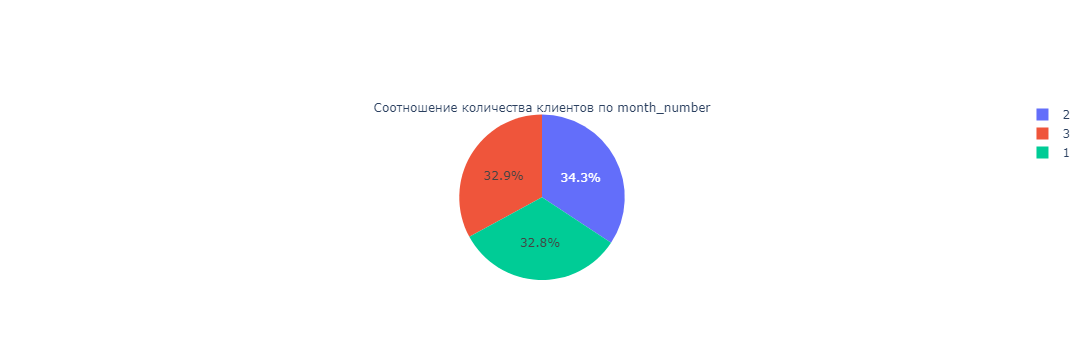

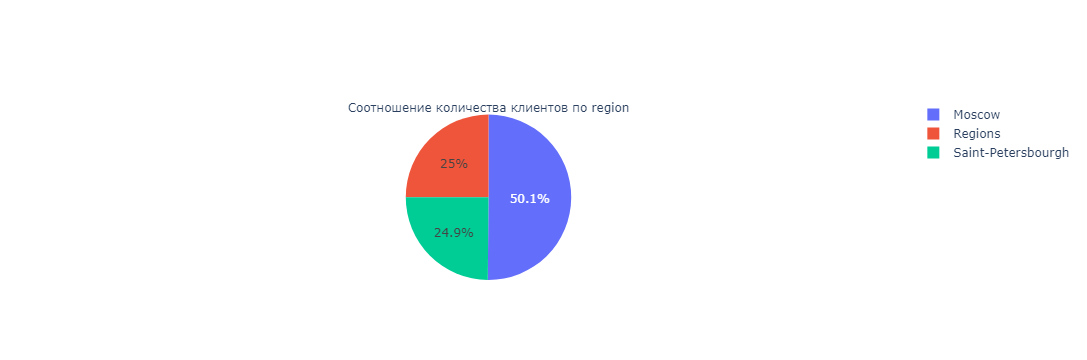

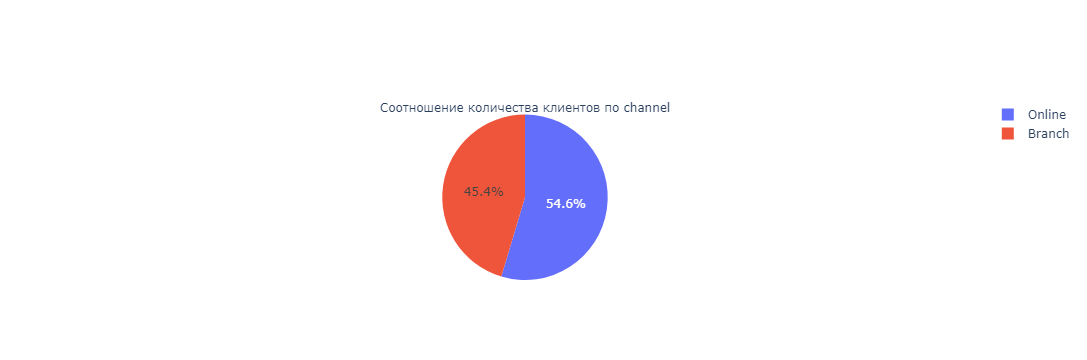

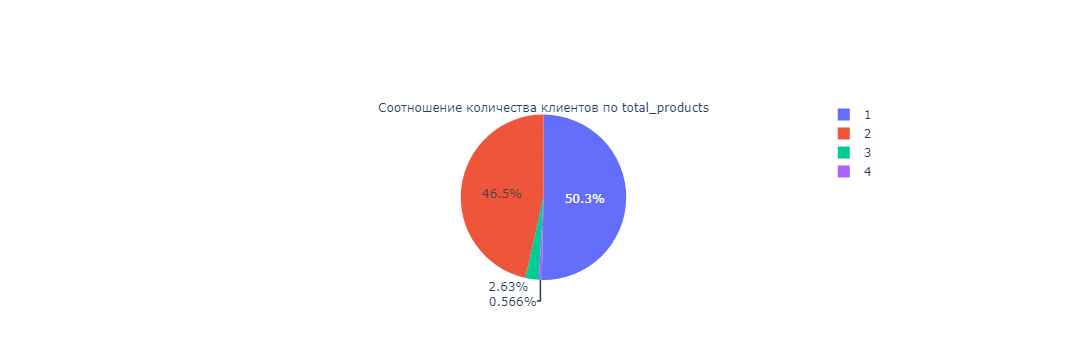

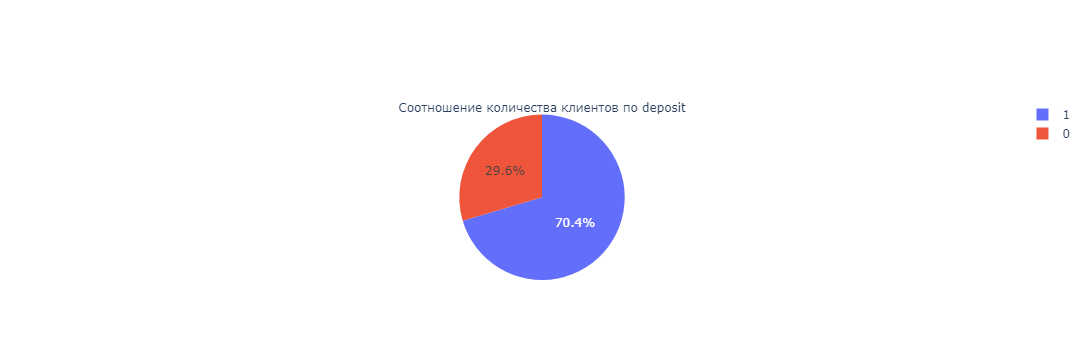

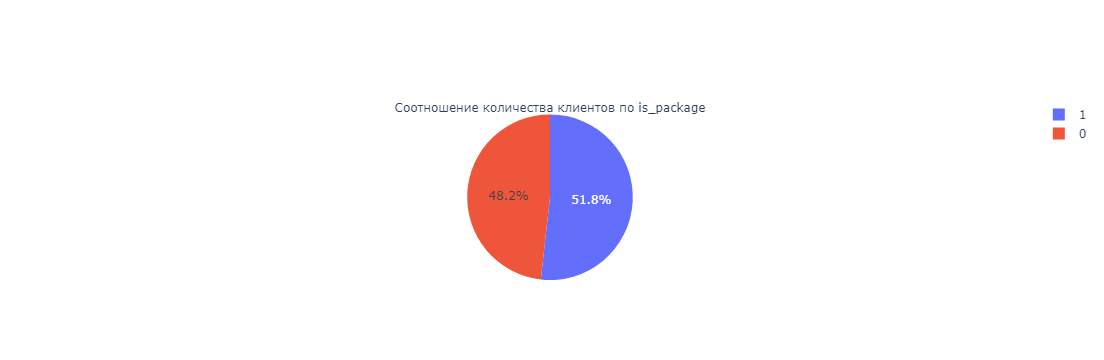

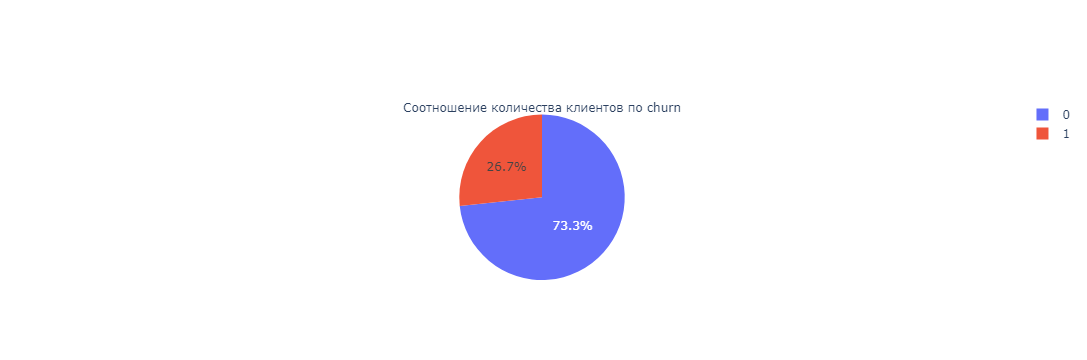

In [657]:
col = ['month_number','region','channel','total_products','deposit','is_package','churn']
for i in col:
    fig = go.Figure(data=[go.Pie(labels=data[i].value_counts().index, values=data[i].value_counts(), \
                             title=f'Соотношение количества клиентов по {i}')])
    fig.show()

Половина клиентов из Москвы. В Санкт-Петербурге и регионах примерно одинаковая доля клиентов (25%). Большая часть клиентов (70%) имеют вклад в банке. Соотношение клиентов по is_package примерно одинаковое. Данные представлены за 3 месяца, примерно одинаковая доля клиентов за каждый месяц.
Доля ушедших клиентов составляет 27%. Большинство клиентов пользуются одним или двумя продуктами. 4 продукта имеют очень малое количество людей (менее 1%)

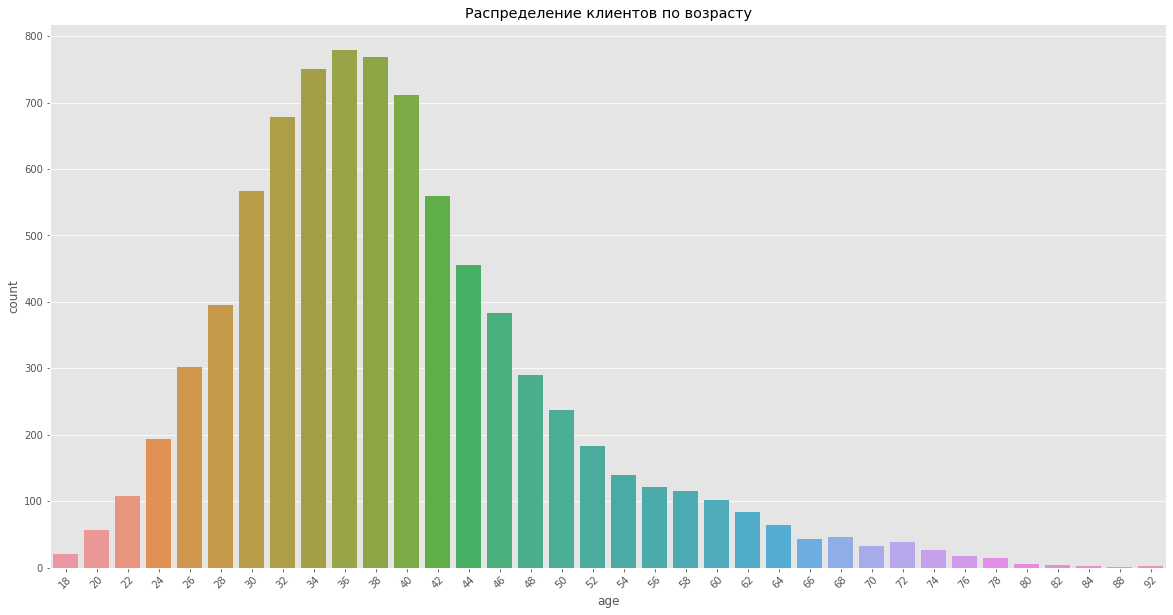

In [658]:
plt.figure(figsize=(20, 10))
sns.countplot(x='age', data=data)
plt.xticks(rotation=45)
plt.title('Распределение клиентов по возрасту')
plt.show()

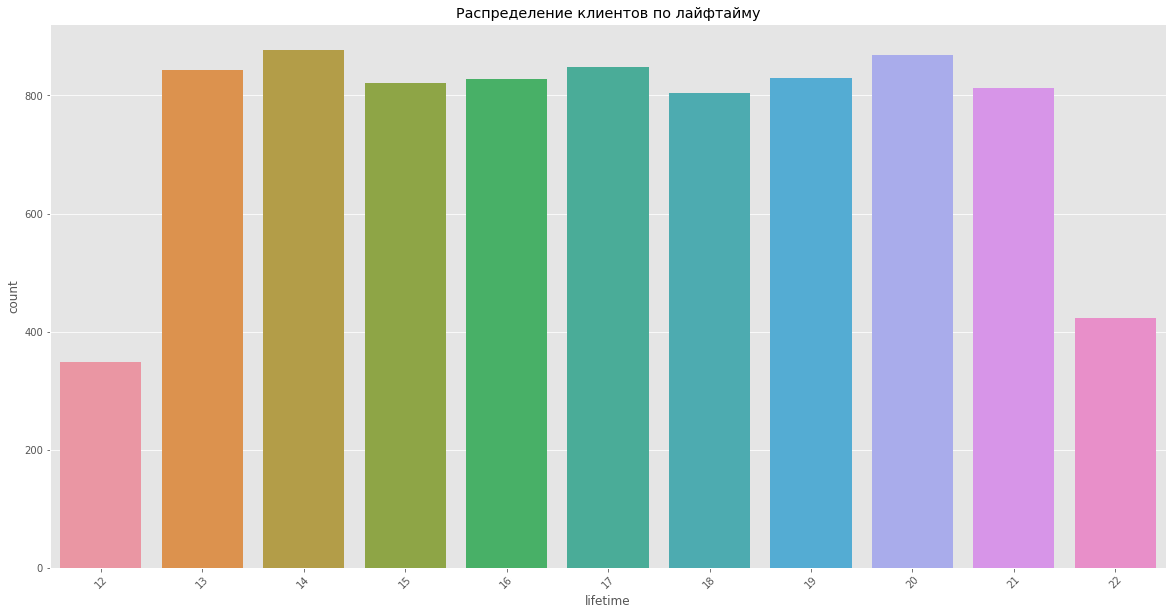

In [659]:
plt.figure(figsize=(20, 10))
sns.countplot(x='lifetime', data=data)
plt.xticks(rotation=45)
plt.title('Распределение клиентов по лайфтайму')
plt.show()

Больше всего клиентов в возрасте от 32 до 40 лет. Примерно одинаковое количество клиентов по лайфтайму. Наименьшее количество клиентов с лайфтаймом 12 и 22. Распределение равномерное

In [660]:
data_lost = data[data['churn'] == False]

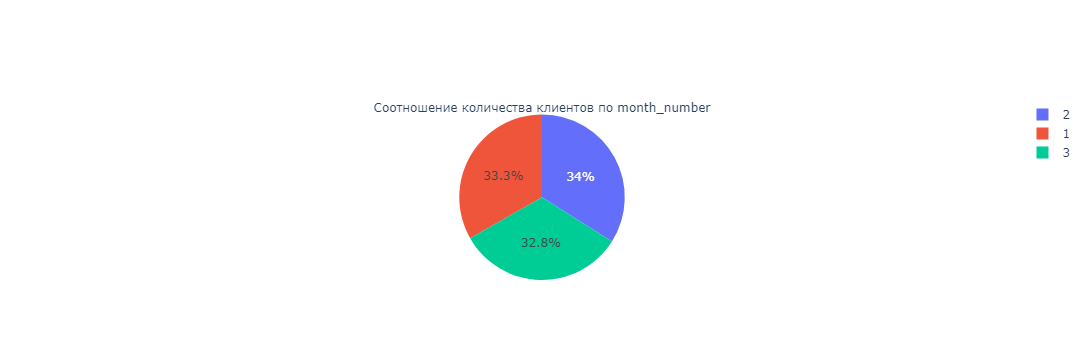

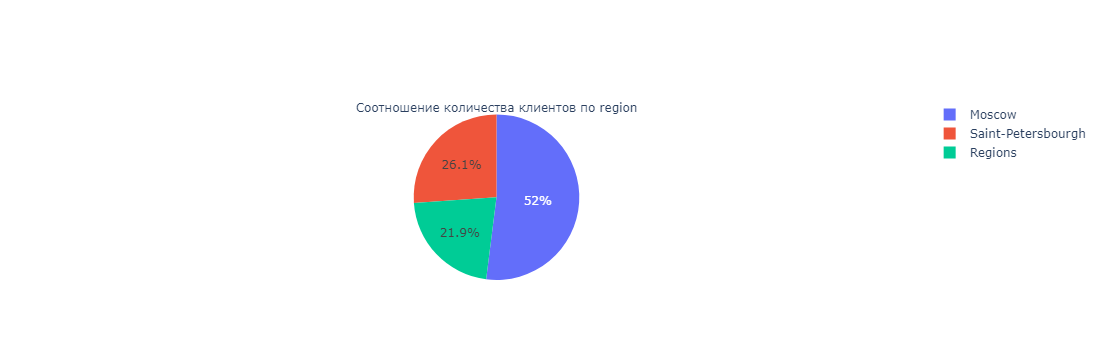

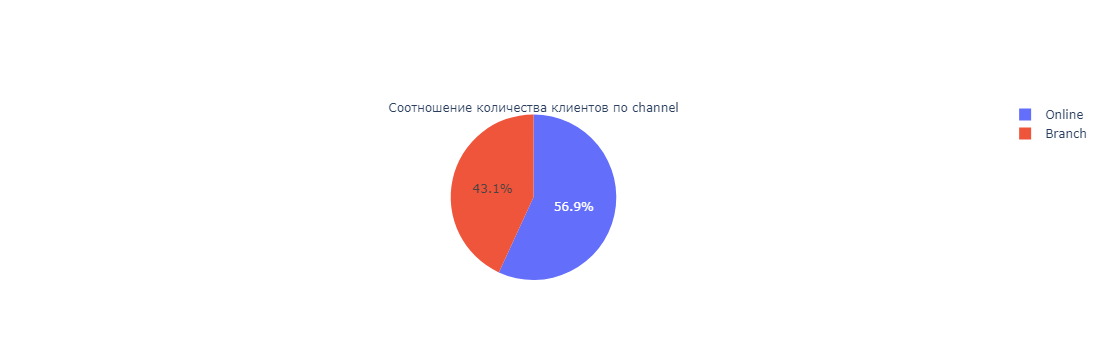

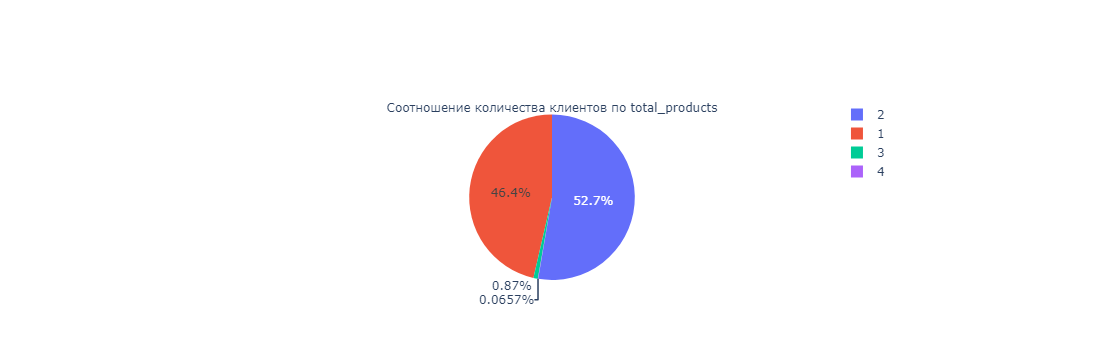

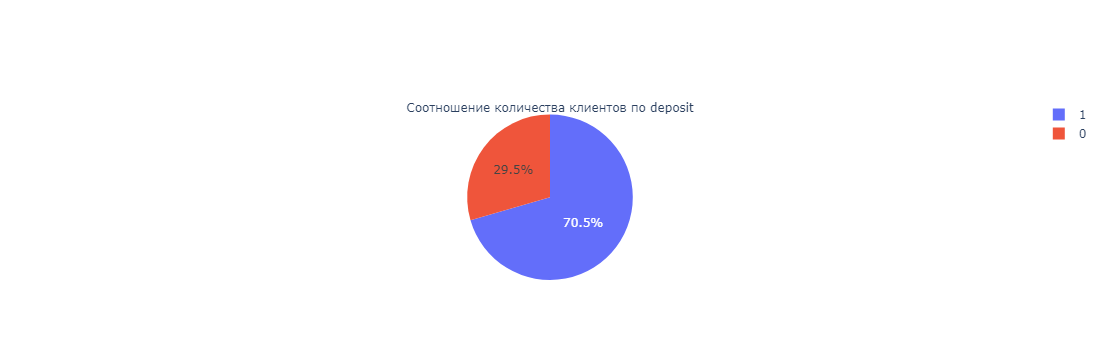

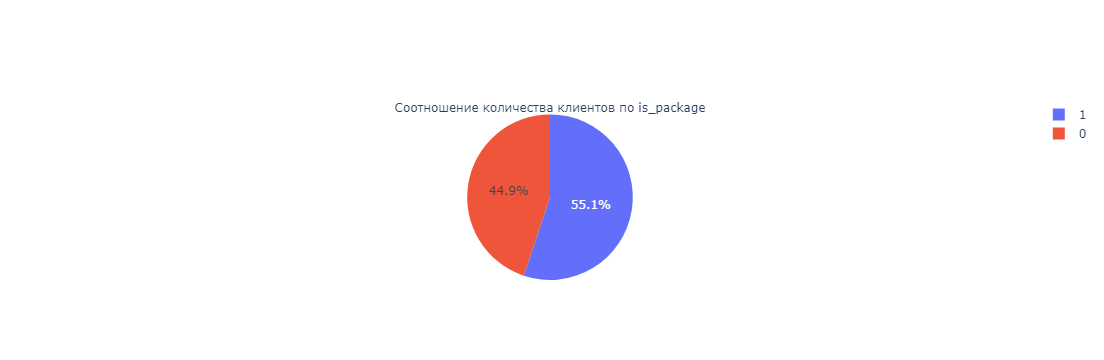

In [661]:
col = ['month_number','region','channel','total_products','deposit','is_package']
for i in col:
    fig = go.Figure(data=[go.Pie(labels=data_lost[i].value_counts().index, values=data_lost[i].value_counts(), \
                             title=f'Соотношение количества клиентов по {i}')])
    fig.show()

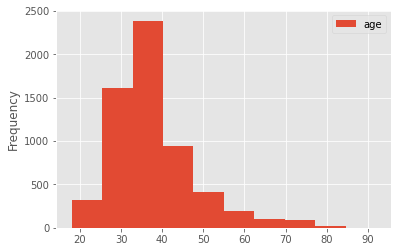

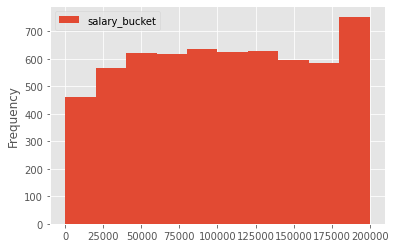

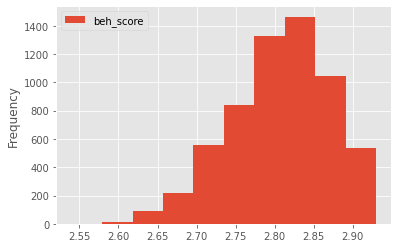

In [662]:
cols = ['age','salary_bucket','beh_score']
for i in cols:
    data_lost.plot(y = i, kind = 'hist', grid = True)

Ушли все клиенты с рейтингом ниже 2,58 и почти все клиенты, пользующиеся 4 продуктами.

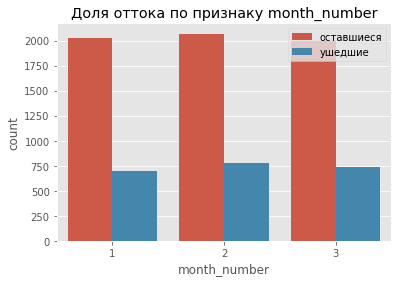

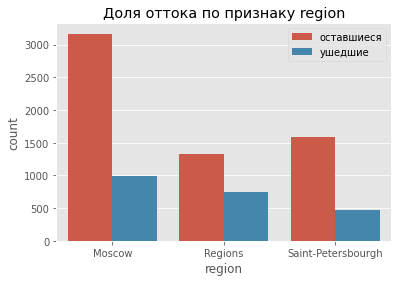

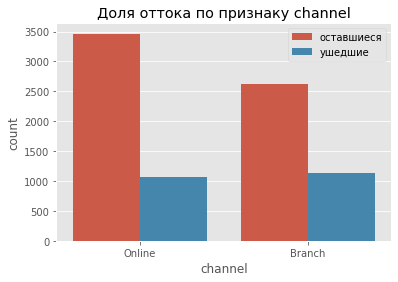

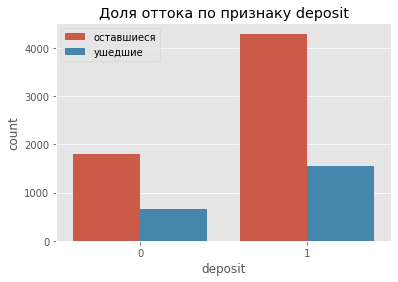

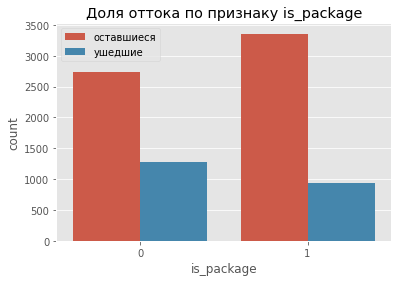

In [663]:
col = ['month_number','region','channel','deposit','is_package']
for i in col:
    ax = sns.countplot(data=data, x=i, hue='churn');
    plt.title(f'Доля оттока по признаку {i}')
    plt.legend(['оставшиеся', 'ушедшие'])
    plt.show()


Больше всего ушедших из регионов. Клиенты, у которых нет package уходят чаще. Клиенты,пользующиеся очным сервисом (не онлайн) уходят чаще. Разницы по месяцам нет

## Сегментация клиентов по количеству потребляемых продуктов

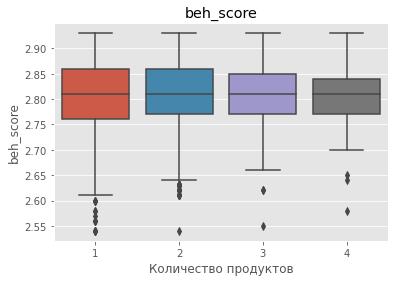

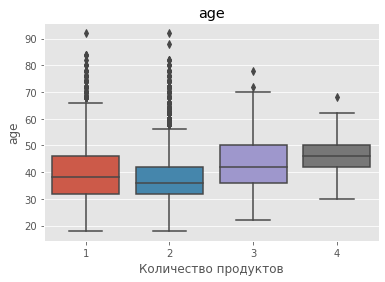

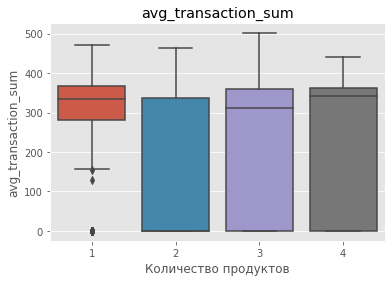

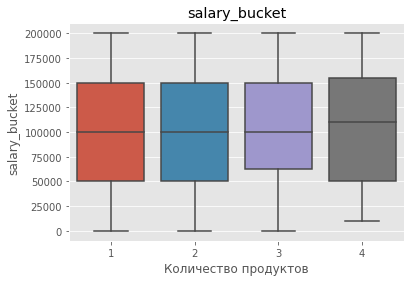

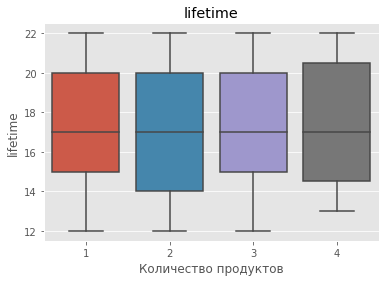

In [664]:
cols = ['beh_score','age','avg_transaction_sum','salary_bucket', 'lifetime']
for i in cols:
    plt.figure()
    sns.boxplot(data=data, y = i, x = 'total_products')
    plt.xlabel('Количество продуктов')
    plt.title(i)
    plt.show();

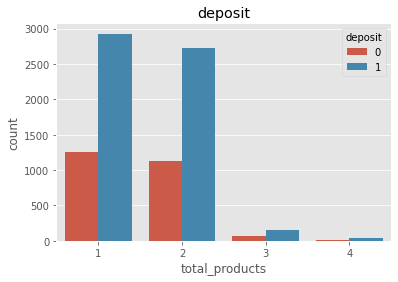

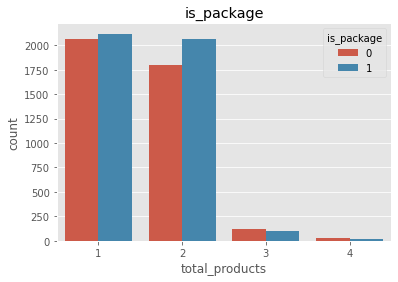

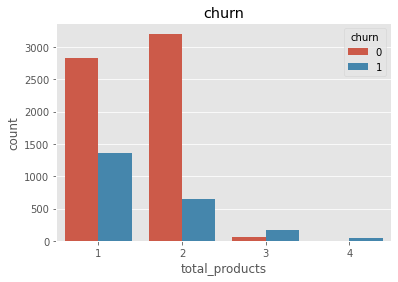

In [665]:
cols =  ['deposit','is_package', 'churn']
for i in cols:
    ax = sns.countplot(data=data, x='total_products', hue=i);
    plt.title(i)
    plt.show()

Баллы кредитного скоринга имеют примерно одинаковое распределение для каждого сегмента по количеству продуктов. Тремя и четырьмя продуктами пользуются самые возрастные клиенты, а двумя продуктами -  самые молодые. У клиентов с одним продуктом наибольшая средняя сумма транзакций. У остальных сегментов почти не различается. Средняя зарплата по сегментам почти не различается.  Больше всего ушли клиенты, которые пользуются тремя или четырьмя продуктами. Почти все клиенты с 4 продуктами ушли, реже всего уходят клиенты,пользующиеся двумя продуктами. Большинство клиентов во всех сегментах имеют депозит. В каждом сегменте примерно половина клиентов имеют пакет. Наибольший лайфтайм среди клиентов с 1, 4 или 3 продуктами

## процентное соотношение оттока клиентов по каждому сегменту

In [666]:
data_churn = data.pivot_table(index='total_products', values=['client_id','churn'], aggfunc={'client_id':'count','churn': 'sum'}).reset_index()
data_churn['percent'] = data_churn['churn']/data_churn['client_id']*100
data_churn

,total_products,churn,client_id,percent
0,1,1353,4178,32.383916
1,2,654,3861,16.938617
2,3,165,218,75.688073
3,4,43,47,91.489362


процент оттока по городам 

In [667]:
churn_city = data.pivot_table(index=['region'], values=['client_id','churn'], aggfunc={'client_id':'count','churn': 'sum'}).reset_index()
churn_city['percent'] = churn_city['churn']/churn_city['client_id']*100
churn_city

,region,churn,client_id,percent
0,Moscow,997,4163,23.949075
1,Regions,742,2075,35.759036
2,Saint-Petersbourgh,476,2066,23.039690


Наибольший отток среди клиентов, которые пользуются тремя или четырьмя продуктами. Реже всех уходят клиенты с двумя продуктами. Наибольший процент оттока в регионах, в Москве и Санкт-Петербурге он примерно одинаковый.

In [668]:
churn_city = data.pivot_table(index=['total_products','region'], values=['client_id','churn'], aggfunc={'client_id':'count','churn': 'sum'}).reset_index()
churn_city['percent'] = churn_city['churn']/churn_city['client_id']*100
churn_city

,total_products,region,churn,client_id,percent
0,1,Moscow,605,2072,29.198842
1,1,Regions,484,1105,43.800905
2,1,Saint-Petersbourgh,264,1001,26.373626
3,2,Moscow,307,1983,15.481594
4,2,Regions,177,869,20.368239
5,2,Saint-Petersbourgh,170,1009,16.848365
6,3,Moscow,65,86,75.581395
7,3,Regions,63,81,77.777778
8,3,Saint-Petersbourgh,37,51,72.549020
9,4,Moscow,20,22,90.909091


Все клиенты с 4 продуктами из Санкт-Петербурга ушли. Среди сегмента клиентов с 3 продуктами наибольший процент оттока из регионов, но разница небольшая. Среди клиентов с 1 продуктом процент оттока из регионов заметно больше (44%). Отток среди клиентов с двумя продуктами небольшой (15-20%) 

## описательный профиль склонного к оттоку клиента

Чаще всего уходят клиенты с 3 и 4 продуктами. Они составляют около 3,2% от всех клиентов. В основном ими пользуются возрастные клиенты. Соотношение ушедших клиентов больше всего в регионах по всем сегментам, кроме 4. У Москвы и Санкт-Петербурга это соотношение примерно одинаковое по сегментам. Все клиенты с рейтингом ниже 2,58 ушли. Клиенты, у которых нет package уходят чаще, как и клиенты,пользующиеся очным сервисом (не онлайн).<br>
Итак, склонный к оттоку клиент пользуется 3 или 4 продуктами, живёт в регионе, имеет низкий рейтинг, пользуется очным сервисом

Рекомендации:
- Сегмент клиентов с одним продуктом: Поскольку клиенты с двумя продуктами имеют самый низкий отток, нужно предлагать второй продукт, делать скидки и выгодные предложения, чтобы замотивировать клиента использовать ещё один продукт. Все клиенты с рейтингом ниже 2,58 покинули банк, поэтому для них можно разработать специальные предложения
- Сегмент клиентов с двумя продуктами: предлагать услуги, ориентированные на молодых клиентов. 
- Сегмент клиентов с тремя продуктами: тут большой отток. Учитывая количество используемых продуктов, эти клиенты ценны для банка. Также у них высокий лайфтайм. Нужно изучить качество предоставляемых продуктов
- Сегмент клиентов с четырьмя продуктами: почти все клиенты ушли. Из проживающих в Санкт-Петербурге ушли все клиенты. Нужно изучить продукты каждого клиента. Это возможно сделать, так как их всего 60. 

Также можно отдельно изучить работу банка в регионах, особенно среди сегмента клиентов с одним продуктом, так как там доля ушедших в регионах заметно выше,чем в других городах

## построение модели

 Построим матрицу корреляции, чтобы исключить регрессоры, которые сильно коррелируют между собой

In [669]:
data['region'] = data.region.map( {'Moscow':0 , 'Saint-Petersbourgh':1, 'Regions':2 } )

In [670]:
data['channel'] = data.channel.map( {'Online':0 , 'Branch':1})

In [671]:
data

,client_id,month_number,age,lifetime,beh_score,region,channel,avg_transaction_sum,total_products,deposit,is_package,salary_bucket,churn
0,20201,2,38,21,2.73,0,0,345,1,1,1,70000.0,0
1,42943,2,30,21,2.80,0,1,269,1,1,1,30000.0,0
2,27570,1,48,13,2.80,2,0,327,1,1,1,150000.0,1
3,25037,3,40,15,2.68,0,0,0,1,1,1,30000.0,0
4,47546,2,20,21,2.88,1,1,0,1,1,0,190000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8300,41670,2,74,12,2.81,0,1,349,1,1,1,160000.0,0
8301,19167,2,32,13,2.78,2,1,344,1,1,1,180000.0,0
8302,16510,1,34,17,2.74,1,0,357,1,0,1,120000.0,0
8303,45094,3,42,20,2.66,0,0,272,3,1,1,190000.0,1


Text(0.5, 1.0, 'матрица корреляции')

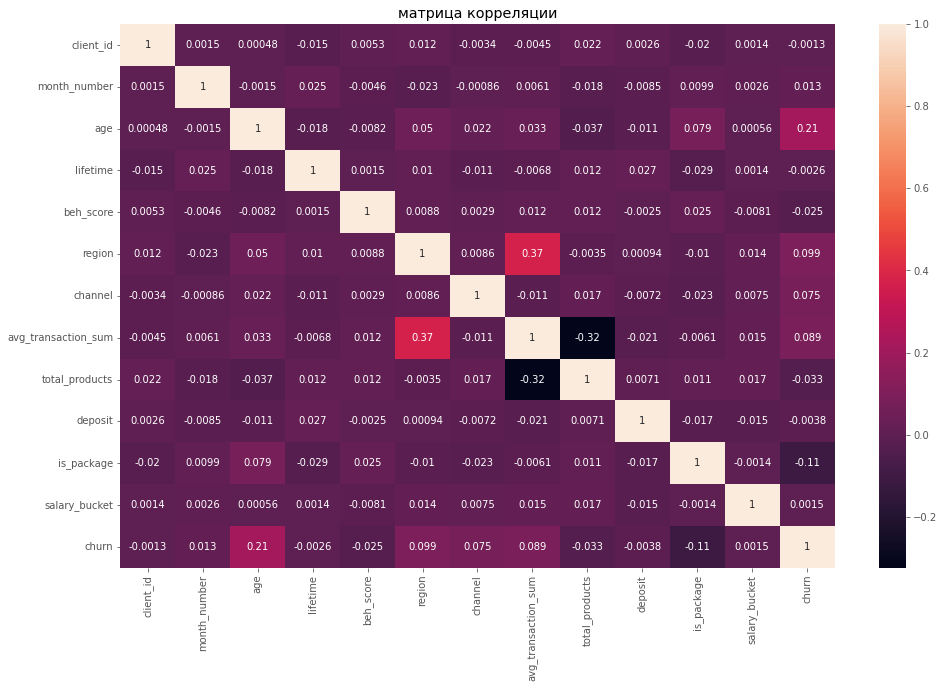

In [672]:
plt.figure(figsize=(16, 10)) 
heatmap = sns.heatmap(data.corr(), annot=True) 
heatmap.set_title('матрица корреляции')

Нет регрессоров, сильно коррелирующих между собой. Можно заметить, что на вероятность ухода наиболее сильно влияет возраст

## Выбор модели

Так как переменная churn фиктивная, будем строить логистическую регрессию

In [687]:
data

,client_id,month_number,age,lifetime,beh_score,region,channel,avg_transaction_sum,total_products,deposit,is_package,salary_bucket,churn
0,20201,2,38,21,2.73,0,0,345,1,1,1,70000.0,0
1,42943,2,30,21,2.80,0,1,269,1,1,1,30000.0,0
2,27570,1,48,13,2.80,2,0,327,1,1,1,150000.0,1
3,25037,3,40,15,2.68,0,0,0,1,1,1,30000.0,0
4,47546,2,20,21,2.88,1,1,0,1,1,0,190000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8300,41670,2,74,12,2.81,0,1,349,1,1,1,160000.0,0
8301,19167,2,32,13,2.78,2,1,344,1,1,1,180000.0,0
8302,16510,1,34,17,2.74,1,0,357,1,0,1,120000.0,0
8303,45094,3,42,20,2.66,0,0,272,3,1,1,190000.0,1


In [689]:
data['region'] = data['region'].astype('int64')
data['channel'] = data['channel'].astype('int64')


In [690]:
y = data[['churn']]

In [691]:
X = data.drop(['churn'], axis=1)

In [692]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [693]:
regressor = LogisticRegression() 
regressor.fit(X_train, y_train)

LogisticRegression()

In [694]:
print(regressor.coef_)
coeff_df = pd.DataFrame(regressor.coef_)
coeff_df = coeff_df.reset_index()
coeff_df

[[-1.00680940e-05 -9.37722105e-03  2.81459953e-02 -1.03950573e-01
  -1.67306394e-02  4.91982698e-03  1.25466802e-03  8.14589416e-04
  -1.02078664e-02 -4.48374462e-03 -9.89753218e-03 -1.59263214e-06]]


,index,0,1,2,3,4,5,6,7,8,9,10,11
0,0,-0.00001,-0.009377,0.028146,-0.103951,-0.016731,0.00492,0.001255,0.000815,-0.010208,-0.004484,-0.009898,-0.000002


In [695]:
for i in range(0,len(coeff_df.axes[1])-1):
    print(f'{X.columns[i]}: {coeff_df[i][0]}')

client_id: -1.0068093996595056e-05
month_number: -0.00937722105431165
age: 0.028145995331568446
lifetime: -0.10395057296799103
beh_score: -0.016730639432019127
region: 0.004919826976424999
channel: 0.0012546680179303996
avg_transaction_sum: 0.0008145894164090847
total_products: -0.01020786635428291
deposit: -0.004483744619055265
is_package: -0.009897532180886615
salary_bucket: -1.5926321397265072e-06


In [696]:
y_pred = regressor.predict(X_test)

In [697]:
len(y_pred)

2492

In [698]:
df = pd.DataFrame(y_pred) 
df

,0
0,0
1,0
2,0
3,0
4,0
...,...
2487,0
2488,0
2489,0
2490,0


In [699]:
result = pd.concat([y_test.reset_index(), df], axis=1, join='outer')

In [700]:
result.columns =['index','фактическое','предсказанное' ]

In [703]:
r_squared = regressor.score (X, y)
print(r_squared)

0.728082851637765


In [704]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.27768860353130015
Mean Squared Error: 0.27768860353130015
Root Mean Squared Error: 0.5269616717858142


R^2 получился средне высоким. Факторы, которые мы включили в модель,описывают зависимость на 72,8%. Остальные 27,2% описывают факторы, не включённые в модель<br>


In [705]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.540943
         Iterations 6
                           Results: Logit
Model:                Logit            Method:           MLE        
Dependent Variable:   churn            Pseudo R-squared: 0.067      
Date:                 2023-07-26 18:32 AIC:              9007.9776  
No. Observations:     8304             BIC:              9092.2715  
Df Model:             11               Log-Likelihood:   -4492.0    
Df Residuals:         8292             LL-Null:          -4816.2    
Converged:            1.0000           LLR p-value:      5.9316e-132
No. Iterations:       6.0000           Scale:            1.0000     
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
client_id           -0.0000   0.0000  -0.4281 0.6686 -0.0000  0.0000
month_number         0.0452 

Удалим незначимые переменные (у которых p-значение больше 0,05)

In [709]:
dataset_drop = data.drop(['salary_bucket','deposit','lifetime','month_number','total_products','client_id'], axis=1)

In [710]:
dataset_drop

,age,beh_score,region,channel,avg_transaction_sum,is_package,churn
0,38,2.73,0,0,345,1,0
1,30,2.80,0,1,269,1,0
2,48,2.80,2,0,327,1,1
3,40,2.68,0,0,0,1,0
4,20,2.88,1,1,0,0,0
...,...,...,...,...,...,...,...
8300,74,2.81,0,1,349,1,0
8301,32,2.78,2,1,344,1,0
8302,34,2.74,1,0,357,1,0
8303,42,2.66,0,0,272,1,1


In [711]:
y = dataset_drop[['churn']]

In [712]:
X = dataset_drop.drop(['churn'], axis=1)

In [713]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.541111
         Iterations 6
                           Results: Logit
Model:                Logit            Method:           MLE        
Dependent Variable:   churn            Pseudo R-squared: 0.067      
Date:                 2023-07-26 18:32 AIC:              8998.7717  
No. Observations:     8304             BIC:              9040.9186  
Df Model:             5                Log-Likelihood:   -4493.4    
Df Residuals:         8298             LL-Null:          -4816.2    
Converged:            1.0000           LLR p-value:      2.7271e-137
No. Iterations:       6.0000           Scale:            1.0000     
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
age                  0.0467   0.0024  19.3622 0.0000  0.0420  0.0515
beh_score           -1.1013 

In [714]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [715]:
regressor = LogisticRegression() 
regressor.fit(X_train, y_train)

LogisticRegression()

In [716]:
y_pred = regressor.predict(X_test)

In [717]:
print(regressor.coef_)
coeff_df = pd.DataFrame(regressor.coef_)
coeff_df = coeff_df.reset_index()
coeff_df

[[ 4.56339825e-02 -9.65584301e-01  1.89629370e-01  2.90488106e-01
   8.88648482e-04 -6.35443930e-01]]


,index,0,1,2,3,4,5
0,0,0.045634,-0.965584,0.189629,0.290488,0.000889,-0.635444


In [718]:
for i in range(0,len(coeff_df.axes[1])-1):
    print(f'{X.columns[i]}: {coeff_df[i][0]}')

age: 0.045633982491734656
beh_score: -0.965584300991542
region: 0.18962936973711525
channel: 0.2904881056648061
avg_transaction_sum: 0.000888648482248892
is_package: -0.6354439295759925


In [719]:
df = pd.DataFrame(y_pred) 

In [720]:
result = pd.concat([y_test.reset_index(), df], axis=1, join='outer')

In [721]:
result.columns =['index','фактическое','предсказанное' ]

In [722]:
result

,index,фактическое,предсказанное
0,1906,0,0
1,2265,0,0
2,2585,0,0
3,3656,0,0
4,5848,1,0
...,...,...,...
2487,1669,0,0
2488,4133,1,0
2489,4434,0,0
2490,415,0,0


In [741]:
clients = data['client_id'][result['index']]
clients = pd.DataFrame(clients)  
clients.reset_index(inplace= True )

In [742]:
result.merge(clients,on='index')

,index,фактическое,предсказанное,client_id
0,1906,0,0,11300
1,2265,0,0,39522
2,2585,0,0,38876
3,3656,0,0,28664
4,5848,1,0,42921
...,...,...,...,...
2487,1669,0,0,34408
2488,4133,1,0,39876
2489,4434,0,0,23801
2490,415,0,0,31694


In [743]:
r_squared = regressor.score (X, y)
print(r_squared)

0.7466281310211946


In [744]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2604333868378812
Mean Squared Error: 0.2604333868378812
Root Mean Squared Error: 0.5103267451720331


R^2 стал немного выше, значения метрик меньше 1, что говорит о хорошем качестве модели.

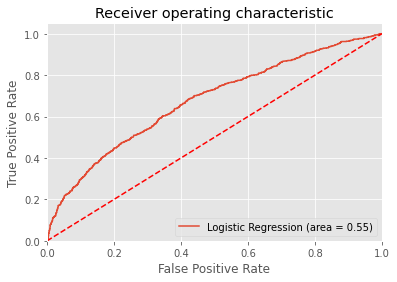

In [745]:
logit_roc_auc = roc_auc_score(y_test, regressor.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, regressor.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Когда мы создаем кривую ROC, мы строим пары истинных положительных результатов и ложных положительных результатов для каждого возможного порога принятия решения модели логистической регрессии. По оси x - ложные положительные результаты, по оси y - истинные положительные результаты

Чем больше кривая ROC охватывает верхний левый угол графика, тем лучше модель классифицирует данные по категориям.

Чтобы дать количественную оценку, мы можем рассчитать AUC (площадь под кривой), которая говорит нам, какая часть графика расположена под крив
Для нашей модели AUC равна 0.55ой

Имеем итоговую модель для прогноза ухода клиента: y = 0.046*age -0.965*beh_score + 0.19*region +  0.2*channel + : 0.01*avg_transaction_sum e: -05*is_package925

Проверка гипотезы различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним

Н0: средний возраст клиентов, которые пользуются одним продуктом банка = среднему возрасту клиентов, которые пользуются двумя продуктами<br>
Н1: средний возраст клиентов, которые пользуются одним продуктом банка ≠ среднему возрасту клиентов, которые пользуются двумя продуктами

Воспользуемся t-тестом, так как нет большого числа выбросов и данные имеют нормальное распределение

In [37]:
age_1 = data[data['total_products'] == 1]['age']

In [38]:
age_2 = data[data['total_products'] == 2]['age']

In [39]:
results = st.ttest_ind(age_1, age_2, equal_var=False)

alpha = 0.05

print(results.pvalue) 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

9.443887968108679e-17
Отвергаем нулевую гипотезу


В среднем возрасте клиентов, пользующихся одним или двумя продуктами, есть различия

Проверка гипотезы различия заработной платы между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним

Н0: средняя заработная плата клиентов, которые пользуются одним продуктом банка = средней зарплате клиентов, которые пользуются двумя продуктами<br>
Н1: средняя зарплата клиентов, которые пользуются одним продуктом банка ≠ средней зарплате клиентов, которые пользуются двумя продуктами

Здесь также воспользуемся t-тестом

In [57]:
salary_1 = data[data['total_products'] == 1].dropna()['salary_bucket']

In [58]:
salary_2 = data[data['total_products'] == 2].dropna()['salary_bucket']

In [60]:
salary_2

5       160000.0
9        30000.0
10       80000.0
14      130000.0
22      110000.0
          ...   
8287    110000.0
8288    110000.0
8292     80000.0
8297     20000.0
8304     30000.0
Name: salary_bucket, Length: 3861, dtype: float64

In [61]:
results = st.ttest_ind(salary_1, salary_2, equal_var=False)

alpha = 0.05

print(results.pvalue) 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.3631230871037666
Не получилось отвергнуть нулевую гипотезу


Нет значимых различий в средней зарплате клиентов,которые пользуются одним продуктом и в зарплате клиентов, пользующихся двумя продуктами